In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('merged_df_train.csv')

In [41]:
df

,Content,Label
0,Bromwell High is a cartoon comedy. It ran at t...,Positive
1,Homelessness (or Houselessness as George Carli...,Positive
2,Brilliant over-acting by Lesley Ann Warren. Be...,Positive
3,This is easily the most underrated film inn th...,Positive
4,This is not the typical Mel Brooks film. It wa...,Positive
...,...,...
24996,This is the kind of movie that my enemies cont...,Negative
24997,I saw 'Descent' last night at the Stockholm Fi...,Negative
24998,Some films that you pick up for a pound turn o...,Negative
24999,"This is one of the dumbest films, I've ever se...",Negative


In [5]:
df['Content'][0] 

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [6]:
df['Content'][24996] 

'This is the kind of movie that my enemies content I watch all the time, but it\'s not bloody true. I only watch it once in a while to make sure that it\'s as bad as I first thought it was.<br /><br />Some kind of mobsters hijack a Boeing 747. (That, at least, is an improvement over having Boeing hijack a good part of the Pentagon.) The airplane goes down in the Bermuda triangle and sinks pressurized to the bottoms, a kind of post-facto submarine.<br /><br />It has one of those all-star casts, the stars either falling or barely above the horizon.<br /><br />"We\'re on our own!", says pilot Jack Lemon. He is so right. Except for George Kennedy. He\'s in all these disaster movies.<br /><br />Watch another movie instead. Oh, not "Airport" the original. That\'s no good either. Instead, watch a decent flick about stuck airplanes like "Flight of the Phoenix."'

In [42]:
df.isna().sum()

Content    0
Label      0
dtype: int64

In [43]:
# df.duplicated().sum() 

In [44]:
# df_train = df.drop_duplicates()

In [45]:
# df_train.duplicated().sum()

In [46]:
# # Assuming your DataFrame is named df and contains a column 'review_text'
# df_train['preprocessed_Content'] = df_train['Content'].apply(preprocess_text)

In [50]:
df_train = df.copy()

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download necessary resources from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
# initialize wordnetlemmatizer
lemmatizer = WordNetLemmatizer()

# get english stopwords from nltk
stop_words = set(stopwords.words('english'))

# define functions for preprocessing steps
def remove_numbers(text):
    # remove numbers using regular expression
    return re.sub(r'\d+', '', text)

def remove_punctuation(text):
    # remove punctuation using regular expression
    return re.sub(r'[^\w\s]', '', text)

def remove_stopwords(text):
    # remove stopwords using nltk's stopwords list
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

def remove_extra_whitespace(text):
    # remove extra whitespaces using regular expression
    return re.sub(' +', ' ', text)

def tokenizer(text):
    # tokenize text using nltk's word_tokenize function
    return word_tokenize(text)

def lemmatizer_function(text):
    # lemmatize text using nltk's wordnetlemmatizer
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# define preprocess_text function to apply all preprocessing steps sequentially
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_extra_whitespace(text)
    text = lemmatizer_function(text)
    return text

# example usage:
text = "This an example sentence with 123 numbers and punctuations! It needs to be preprocessed."
preprocessed_text = preprocess_text(text)
print(preprocessed_text)


example sentence number punctuation need preprocessed


In [9]:
# Assuming your DataFrame is named df and contains a column 'review_text'
df_train['preprocessed_review'] = df_train['Content'].apply(preprocess_text)

In [11]:
# # Assuming you want to remove the row with index 'row_index'
# row_index = 25000  # Replace this with the index of the row you want to remove

# # Remove the row
# df_train.drop(row_index, inplace=True)

# # After removing the row, reset the index if needed
# df_train.reset_index(drop=True, inplace=True)


In [25]:
# Assuming 'preprocessed_review' is the column containing preprocessed text
# df_test['preprocessed_review'] = df_test['preprocessed_review'].str.lower()

In [38]:
df_train

,Content,Label,preprocessed_review
0,Bromwell High is a cartoon comedy. It ran at t...,Positive,bromwell high cartoon comedy ran time program ...
1,Homelessness (or Houselessness as George Carli...,Positive,homelessness houselessness george carlin state...
2,Brilliant over-acting by Lesley Ann Warren. Be...,Positive,brilliant overacting lesley ann warren best dr...
3,This is easily the most underrated film inn th...,Positive,easily underrated film inn brooks cannon sure ...
4,This is not the typical Mel Brooks film. It wa...,Positive,typical mel brooks film much le slapstick movi...
...,...,...,...
24995,"Towards the end of the movie, I felt it was to...",Negative,towards end movie felt technical felt like cla...
24996,This is the kind of movie that my enemies cont...,Negative,kind movie enemy content watch time bloody tru...
24997,I saw 'Descent' last night at the Stockholm Fi...,Negative,saw descent last night stockholm film festival...
24998,Some films that you pick up for a pound turn o...,Negative,film pick pound turn rather good rd century fi...


In [27]:
# Assuming 'Unnamed: 0' is the column you want to drop
# df_test.drop(columns=['Unnamed: 0'], inplace=True)

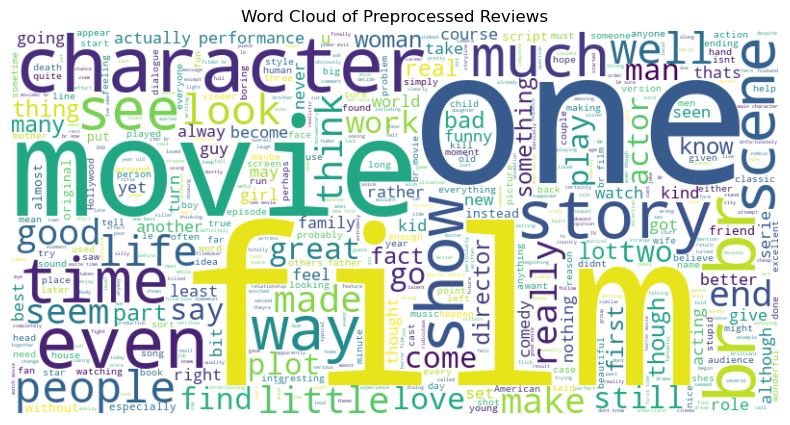

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine preprocessed reviews into a single string
combined_text = ' '.join(df_train['preprocessed_review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=500, background_color='white').generate(combined_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preprocessed Reviews')
plt.show()


# Save Train preprocessed data in csv

In [22]:
# saving the dataframe
df_train.to_csv('pre-processed_df_train_Final.csv')

In [ ]:
### Test data

In [15]:
dff = pd.read_csv('merged_df_test.csv')

In [16]:
dff

,Content,Label
0,I went and saw this movie last night after bei...,Positive
1,Actor turned director Bill Paxton follows up h...,Positive
2,As a recreational golfer with some knowledge o...,Positive
3,"I saw this film in a sneak preview, and it is ...",Positive
4,Bill Paxton has taken the true story of the 19...,Positive
...,...,...
24996,When all we have anymore is pretty much realit...,Negative
24997,The basic genre is a thriller intercut with an...,Negative
24998,Four things intrigued me as to this film - fir...,Negative
24999,David Bryce's comments nearby are exceptionall...,Negative


In [17]:
dff.isna().sum()

Content    0
Label      0
dtype: int64

In [19]:
df_test = dff.copy()

In [20]:
# Assuming your DataFrame is named df and contains a column 'review_text'
df_test['preprocessed_review'] = df_test['Content'].apply(preprocess_text)

In [22]:
# Assuming you want to remove the row with index 'row_index'
row_index = 25000  # Replace this with the index of the row you want to remove

# Remove the row
df_test.drop(row_index, inplace=True)

# After removing the row, reset the index if needed
df_test.reset_index(drop=True, inplace=True)


In [34]:
df_test

,Content,Label,preprocessed_review
0,I went and saw this movie last night after bei...,Positive,went saw movie last night coaxed friend mine i...
1,Actor turned director Bill Paxton follows up h...,Positive,actor turned director bill paxton follows prom...
2,As a recreational golfer with some knowledge o...,Positive,recreational golfer knowledge sport history pl...
3,"I saw this film in a sneak preview, and it is ...",Positive,saw film sneak preview delightful cinematograp...
4,Bill Paxton has taken the true story of the 19...,Positive,bill paxton taken true story us golf open made...
...,...,...,...
24995,I occasionally let my kids watch this garbage ...,Negative,occasionally let kid watch garbage understand ...
24996,When all we have anymore is pretty much realit...,Negative,anymore pretty much reality tv show people mak...
24997,The basic genre is a thriller intercut with an...,Negative,basic genre thriller intercut uncomfortable me...
24998,Four things intrigued me as to this film - fir...,Negative,four thing intrigued film firstly star carly p...


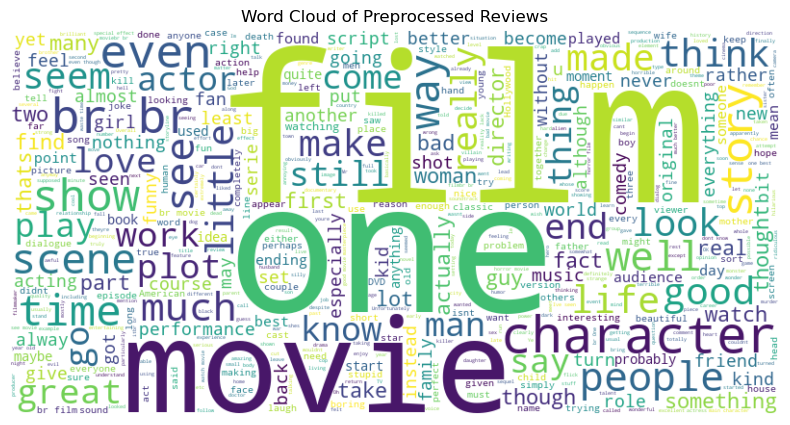

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine preprocessed reviews into a single string
combined_text = ' '.join(df_test['preprocessed_review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=500, background_color='white').generate(combined_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preprocessed Reviews')
plt.show()


# Save Test preprocessed data in csv

In [35]:
# saving the dataframe
df_test.to_csv('pre-processed_df_test_Final.csv')

In [2]:
# //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////// #